## 4.1、从数据中学习

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

### 4.1.1、数据驱动

机器学习的方法则极力避免人为介入，尝试从收集到的数据中发现答案（模式）。  
神经网络或深度学习则比以往的机器学习方法更能避免人为介入。  

现在我们来思考一个具体的问题，比如如何实现数字“5”的识别。
<img src="./imgs/4_1.png"></img>

如果让我们自己来设计一个能将5正确分类的程序，就会意外地发现这是一个很难的问题。  
人可以简单地识别出5，`但却很难明确说出是基于何种规律而识别出了5`。  

与其绞尽脑汁，从零开始想出一个可以识别5的算法，不如考虑通过有效利用数据来解决这个问题。  
一种方案是，先从图像中提取**特征量**,再用机器学习技术学习这些特征量的模式。  
这里所说的“特征量”是指可以从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。图像的特征量通常表示为向量的形式。在计算机视觉领域，常用的特征量包括SIFT、 SURF和HOG等。使用这些特征量将图像数据转换为向量，然后对转换后的向量使用机器学习中的SVM、 KNN等分类器进行学习。  

机器学习的方法中，由机器从收集到的数据中找出规律性。  
与从零开始想出算法相比，这种方法可以更高效地解决问题，也能减轻人的负担。  
但是需要注意的是，将图像转换为向量时使用的特征量仍是由人设计的。  
对于不同的问题，必须使用合适的特征量（必须设计专门的特征量），才能得到好的结果。  
比如，为了区分狗的脸部，人们需要考虑与用于识别5的特征量不同的其他特征量。  
也就是说，即使使用特征量和机器学习的方法，也需要针对不同的问题人工考虑合适的特征量。  

到这里，我们介绍了两种针对机器学习任务的方法。将这两种方法用图来表示，如图4-2所示。  
图中还展示了神经网络（深度学习）的方法，可以看出该方法不存在人为介入。
<img src="./imgs/4_2.png"></img>
如图4-2所示，神经网络直接学习图像本身。  
在第2个方法，即利用特征量和机器学习的方法中，特征量仍是由人工设计的，而在神经网络中，连图像中包含的重要特征量也都是由机器来学习的。

深度学习有时也称为端到端机器学习（end-to-end machine learning）。这里所说的**端到端**是指从一端到另一端的意思，也就是从原始数据（输入）中获得目标结果（输出）的意思。

`神经网络的优点是对所有的问题都可以用同样的流程来解决`。<br>
比如，不管要求解的问题是识别5，还是识别狗，抑或是识别人脸，神经网络都是通过不断地学习所提供的数据，尝试发现待求解的问题的模式。  
也就是说，与待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端”的学习。  

### 4.1.2、训练数据和测试数据

本章主要介绍神经网络的学习，不过在这之前，我们先来介绍一下机器学习中有关数据处理的一些注意事项。

机器学习中，一般将数据分为**训练数据**和**测试数据**两部分来进行学习和实验等。  
首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。  
为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的**泛化能力**。  
为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以称为**监督数据**。  

**泛化能力**是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。<br>
`获得泛化能力是机器学习的最终目标`。<br>
比如，在识别手写数字的问题中，泛化能力可能会被用在自动读取明信片的邮政编码的系统上。  
此时，手写数字识别就必须具备较高的识别“某个人”写的字的能力。  
注意这里不是“特定的某个人写的特定的文字”，而是“任意一个人写的任意文字”。  
如果系统只能正确识别已有的训练数据，那有可能是只学习到了训练数据中的个人的习惯写法。  

因此，`仅仅用一个数据集去学习和评价参数，是无法进行正确评价的`。<br>
这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。  
顺便说一下，只对某个数据集过度拟合的状态称为**过拟合**（over fitting）。  
避免过拟合也是机器学习的一个重要课题。  

## 4.2、损失函数

神经网络的学习通过某个指标表示现在的状态。然后，以这个指标为基准，寻找`最优权重参数`。  
神经网络的学习中所用的指标称为**损失函数**（loss function）。  
这个损失函数可以使用任意函数，但一般用`均方误差`和`交叉熵误差`等。

损失函数是表示神经网络性能的“恶劣程度”的指标，即当前的神经网络对监督数据在多大程度上不拟合，在多大程度上不一致。  
以“性能的恶劣程度”为指标可能会使人感到不太自然，但是如果给损失函数乘上一个负值，就可以解释为“在多大程度上不坏”，即“性能有多好”。  
并且，“使性能的恶劣程度达到最小”和“使性能的优良程度达到最大”是等价的，不管是用“恶劣程度”还是“优良程度”，做的事情本质上都是一样的。  

### 4.2.1、均方误差

可以用作损失函数的函数有很多，其中最有名的是均方误差（mean squared
error）。均方误差如下式所示：$$
E = \frac { 1 } { 2 } \sum _ { k } \left( y _ { k } - t _ { k } \right) ^ { 2 }
$$<center>式（4.1）</center>

这里， yk是表示神经网络的输出， tk表示监督数据， k表示数据的维数

比如，在3.6节手写数字识别的例子中， yk、 tk是由如下10个元素构成的数据。

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

数组元素的索引从第一个开始依次对应数字“0”“1”“2”……   
这里，神经网络的输出y是softmax函数的输出。由于softmax函数的输出可以理解为概率，因此上例表示“0”的概率是0.1，“1”的概率是0.05，“2”的概率是0.6
等。   
t是监督数据，将正确解标签设为1，其他均设为0。  
这里，标签“2”为1，表示正确解是“2”。  
将正确解标签表示为1，其他标签表示为0的表示方法称为**one-hot表示**。

如式（4.1）所示，均方误差会计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和。  现在，我们用Python来实现这个均方误差，  
实现方式如下所示：

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #设“2”为正确解
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #“2”的概率最高的情况（0.6）
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #“7”的概率最高的情况（0.6）
mean_squared_error(np.array(y), np.array(t))

0.5975

我们发现第一个例子的损失函数的值更小，和监督数据之间的误差较小。  
也就是说，均方误差显示第一个例子的输出结果与监督数据更加吻合。  

### 4.2.2、交叉熵误差

除了均方误差之外， **交叉熵误差**（cross entropy error）也经常被用作损失函数。  
交叉熵误差如下式所示：$$
E = - \sum _ { k } t _ { k } \log y _ { k }
$$  
<center>式（4.2）</center>

这里， log表示以e为底数的自然对数（log e）。   
yk是神经网络的输出， tk是正确解标签。并且， tk中只有正确解标签的索引为1，其他均为0（one-hot表示）。  
因此，式（4.2）实际上只计算对应正确解标签的输出的自然对数。  
比如，假设正确解标签的索引是“2”，与之对应的神经网络的输出是0.6，则交叉熵误差是−log 0.6 = 0.51；若“2”对应的输出是0.1，则交叉熵误差为−log 0.1 = 2.30。  
也就是说，`交叉熵误差的值是由正确解标签所对应的输出结果决定的`。

自然对数的图像如图4-3所示：
<img src="./imgs/4_3.png"></img>

x等于1时， y为0；随着x向0靠近， y逐渐变小。  
因此，正确解标签对应的输出越大，式（4.2）的值越接近0；  
当输出为1时，交叉熵误差为0。  
此外，如果正确解标签对应的输出较小，则式（4.2）的值较大。  

下面，我们来用代码实现交叉熵误差:

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

函数内部在计算np.log时，加上了一个微小值delta。  
这是因为，当出现np.log(0)时， np.log(0)会变为负无限大的-inf，这样一来就会导致后续计算无法进行。  
作为保护性对策，添加一个微小值可以防止负无限大的发生。  

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

第一个例子中，正确解标签对应的输出为0.6，此时的交叉熵误差大约为0.51。  
第二个例子中，正确解标签对应的输出为0.1的低值，此时的交叉熵误差大约为2.3。  
由此可以看出，这些结果与我们前面讨论的内容是一致的。  

### 4.2.3、mini-batch学习

机器学习使用训练数据进行学习。  
使用训练数据进行学习，严格来说，就是针对训练数据计算损失函数的值，找出使该值尽可能小的参数。  
因此，计算损失函数时必须将所有的训练数据作为对象。  
也就是说，如果训练数据有100个的话，我们就要把这100个损失函数的总和作为学习的指标。  

如果要求所有训练数据的损失函数的总和，以交叉熵误差为例，可以写成下面
的式（4.3）：$$
E = - \frac { 1 } { N } \sum _ { n } \sum _ { k } t _ { n k } \log y _ { n k }
$$  
<center>式（4.3）</center>

这里,假设数据有N个， tnk表示第n个数据的第k个元素的值（ynk是神经网络的输出， tnk是监督数据）。  
式子虽然看起来有一些复杂，其实只是把`求单个数据的损失函数的式（4.2）扩大到了N份数据，不过最后还要除以N进行正规化`。  
通过除以N，可以求单个数据的“平均损失函数”。  
通过这样的平均化，可以获得和训练数据的数量无关的统一指标。  
比如，即便训练数据有1000个或10000个，也可以求得单个数据的平均损失函数。  

另外， MNIST数据集的训练数据有60000个，如果以全部数据为对象求损失函数的和，则计算过程需要花费较长的时间。  
再者，如果遇到大数据，数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函
数是不现实的。  
因此，我们从全部数据中选出一部分，作为全部数据的“近似”。  
神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。  
比如，从60000个训练数据中随机选择100笔，再用这100笔数据进行学习。  
这种学习方式称为**mini-batch学习**。  

下面我们来编写从训练数据中随机选择指定个数的数据的代码，以进行mini-batch学习。  
在这之前，先来看一下用于读入MNIST数据集的代码：

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


load_mnist函数是用于读入MNIST数据集的函数。这个
函数在本书提供的脚本dataset/mnist.py中，它会读入训练数据和测试数据。  
参 数normalize设置是否将输入图像正规化为0.0～1.0的值。  
如果将该参数设置为 False，则输入图像的像素会保持原来的0～255。  
设定参数 one_hot_label=True，可以得到one-hot表示（即仅正确解标签为1，其余为0的数据结构）。    

读入上面的MNIST数据后，训练数据有60000个，输入数据是784维（28 × 28）的图像数据，监督数据是10维的数据。  
因此，上面的 x_train、 t_train的形状分别是(60000, 784)和(60000, 10)。  

那么，如何从这个训练数据中随机抽取10笔数据呢？  
我们可以使用NumPy的np.random.choice()，写成如下形式：

In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
x_batch
t_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

使用np.random.choice()可以从指定的数字中随机选择想要的数字。  
比如，np.random.choice(60000, 10)会从0到59999之间随机选择10个数字。  
如下面的实际代码所示，我们可以得到一个包含被选数据的索引的数组：  

In [12]:
np.random.choice(60000, 10)

array([40619, 18848,  7065, 58149, 24765, 41364,  3277,  5178, 59158,
       29328])

之后，我们只需指定这些随机选出的索引，取出mini-batch，然后使用这个mini-batch计算损失函数即可。

计算电视收视率时，并不会统计所有家庭的电视机，而是仅以那些被选中的家庭为统计对象。  
比如，通过从关东地区随机选择1000个家庭计算收视率，可以近似地求得关东地区整体的收视率。  
这1000个家庭的收视率，虽然严格上不等于整体的收视率，但可以作为整体的一个近似值。  
和收视率一样，mini-batch的损失函数也是利用一部分样本数据来近似地计算整体。  
也就是说，用随机选择的小批量数据（mini-batch）作为全体训练数据的近似值。  

### 4.2.4、mini-batch版交叉熵误差的实现

如何实现对应mini-batch的交叉熵误差呢？  
只要改良一下之前实现的对应单个数据的交叉熵误差就可以了。  
这里，我们来实现一个可以同时处理单个数据和批量数据（数据作为batch集中输入）两种情况的函数。  

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

这里， y是神经网络的输出， t是监督数据。   
y的维度为1时，即求单个数据的交叉熵误差时，需要改变数据的形状。  
并且，当输入为mini-batch时，要用batch的个数进行正规化，计算单个数据的平均交叉熵误差。  

当监督数据是标签形式（非one-hot表示，而是像“2”“7”这样的标签）时，交叉熵误差可通过如下代码实现：

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

实现的要点是，由于one-hot表示中t为0的元素的交叉熵误差也为0，因此针对这些元素的计算可以忽略。  
换言之，如果可以获得神经网络在正确解标签处的输出，就可以计算交叉熵误差。  
因此， t为 one-hot表示时通过t * np.log(y)计算的地方，在 t为标签形式时，可用 np.log( y[np.arange(batch_size), t] )实现相同的处理（为了便于观察，这里省略了微小值1e-7）。  

作为参考，简单介绍一下np.log( y[np.arange(batch_size), t] )。   
np.arange(batch_size)会生成一个从0到 batch_size-1的数组。  
比如当 batch_size为5时， np.arange(batch_size)会生成一个NumPy 数组 [0, 1, 2, 3, 4]。  
因为t中标签是以 [2, 7, 0, 9, 4]的形式存储的，所以 y[np.arange(batch_size),
t]能抽出各个数据的正确解标签对应的神经网络的输出（在这个例子中，y[np.arange(batch_size), t] 会 生 成 NumPy 数 组[y[0,2],y[1,7],y[2,0],y[3,9], y[4,4]]）

### 4.2.5、为何要设定损失函数

以数字识别任务为例，我们想获得的是能提高识别精度的参数，特意再导入一个损失函数不是有些重复劳动吗？  
也就是说，既然我们的目标是获得使识别精度尽可能高的神经网络，那不是应该把识别精度作为指标吗？  

对于这一疑问，我们可以根据“导数”在神经网络学习中的作用来回答。  
下一节中会详细说到，在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。  
为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值。  

假设有一个神经网络，现在我们来关注这个神经网络中的某一个权重参数。  
此时，对该权重参数的损失函数求导，表示的是“如果稍微改变这个权重参数的值，损失函数的值会如何变化”。  
如果导数的值为负，通过使该权重参数向正方向改变，可以减小损失函数的值；反过来，如果导数的值为正，则通过使该权重参数向负方向改变，可以减小损失函数的值。  
不过，当导数的值为0时，无论权重参数向哪个方向变化，损失函数的值都不会改变，此时该权重参数的更新会停在此处。  

之所以不能用识别精度作为指标，是因为这样一来绝大多数地方的导数
都会变为0，导致参数无法更新。  
我们来总结一下上面的内容：

In [ ]:
'''
在进行神经网络的学习时，不能将识别精度作为指标。
因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0。
'''

为什么用识别精度作为指标时，参数的导数在绝大多数地方都会变成0呢？  
为了回答这个问题，我们来思考另一个具体例子。  

假设某个神经网络正确识别出了100笔训练数据中的32笔，此时识别精度为32 %。  
如果以识别精度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在32 %，不会
出现变化。  
也就是说，仅仅微调参数，是无法改善识别精度的。  
即便识别精度有所改善，它的值也不会像32.0123 . . . %这样连续变化，而是变为33 %、
34 %这样的不连续的、离散的值。  
而如果把损失函数作为指标，则当前损失函数的值可以表示为0.92543 . . . 这样的值。  
并且，如果稍微改变一下参数的值，对应的损失函数也会像0.93432 . . . 这样发生连续性的变化。  

识别精度对微小的参数变化基本上没有什么反应，即便有反应，它的值也是不连续地、突然地变化。  
作为激活函数的阶跃函数也有同样的情况。  
出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。  
如图4-4所示，阶跃函数的导数在绝大多数地方（除了0以外的地方）均为0。  
也就是说，如果使用了阶跃函数，那么即便将损失函数作为指标，参数的微小变化也会被阶跃函数抹杀，导致损失函数的值不会产生任何变化。  

阶跃函数就像“竹筒敲石”一样，只在某个瞬间产生变化。  
而sigmoid函数，如图4-4所示，不仅函数的输出（竖轴的值）是连续变化的，曲线的斜率（导数）也是连续变化的。  
也就是说， `sigmoid函数的导数在任何地方都不为0`，这对神经网络的学习非常重要。  
得益于这个斜率不会为0的性质，神经网络的学习得以正确进行。  

<img src="./imgs/4_4.png"></img>

## 4.3、数值微分

`梯度法使用梯度的信息决定前进的方向`。<br>
本节将介绍梯度是什么、有什么性质等内容。在这之前，我们先来介绍一下导数。

### 4.3.1、导数

假如你是全程马拉松选手，在开始的10分钟内跑了2千米。  
如果要计算此时的奔跑速度，则为2/10 = 0.2［千米/分］。  
也就是说，你以1分钟前进0.2千米的速度（变化）奔跑。  

在这个马拉松的例子中，我们计算了“奔跑的距离”相对于“时间”发生了多大变化。  
不过，这个10分钟跑2千米的计算方式，严格地讲，计算的是10分钟内的平均速度。  
而导数表示的是某个瞬间的变化量。  
因此，将10分钟这一时间段尽可能地缩短，比如计算前1分钟奔跑的距离、前1秒钟奔跑的距离、前0.1秒钟奔跑的距离……这样就可以获得某个瞬间的变化量（某个瞬时速度）。  

综上，导数就是表示某个瞬间的变化量。它可以定义成下面的式子：
$$
\frac { \mathrm { d } f ( x ) } { \mathrm { d } x } = \lim _ { h \rightarrow 0 } \frac { f ( x + h ) - f ( x ) } { h }
$$
<center>式（4.4）</center>

式（4.4）表示的是函数的导数。  
左边的符号表示f（x）关于x的导数，即f（x）相对于x的变化程度。  
式（4.4）表示的导数的含义是， x的“微小变化”将导致函数f（x）的值在多大程度上发生变化。  
其中，表示微小变化的h无限趋近0，表示为：$$
\lim _ { h \rightarrow 0 }
$$

接下来，我们参考式（4.4），来实现求函数的导数的程序。  
如果直接实现式（4.4）的话，向h中赋入一个微小值，就可以计算出来了。  
比如，下面的实现如何？

In [15]:
# 不好的实现示例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

函数numerical_diff(f, x)的名称来源于**数值微分**的英文numerical differentiation。  
这个函数有两个参数，即“函数f”和“传给函数f的参数x”。  
乍一看这个实现没有问题，但是实际上这段代码有两处需要改进的地方。

在上面的实现中，因为想把尽可能小的值赋给 h（可以话，想让h无限接近0），所以h使用了10e-50（有50个连续的0的“0.00 . . . 1”）这个微小值。  
但是，这样反而产生了**舍入误差**（rounding error）。  
所谓舍入误差，是指因省略小数的精细部分的数值（比如，小数点第8位以后的数值）而造成最终的计算结果上的误差。  
比如，在Python中，舍入误差可如下表示：

In [16]:
np.float32(1e-50)

0.0

如果用float32类型（32位的浮点数）来表示1e-50，就会变成0.0，无法正确表示出来。  
也就是说，使用过小的值会造成计算机出现计算上的问题。  
这是第一个需要改进的地方，即将微小值 h改为10−4。  
使用10−4就可以得到正确的结果。  

第二个需要改进的地方与函数f的差分有关。  
虽然上述实现中计算了函数 f在 x+h和 x之间的差分，但是必须注意到，这个计算从一开始就有误差。
如图4-5所示，“真的导数”对应函数在x处的斜率（称为切线），但上述实现中计算的导数对应的是(x + h)和x之间的斜率。  
因此，真的导数（真的切线）和上述实现中得到的导数的值在严格意义上并不一致。  
这个差异的出现是因为h不可能无限接近0。

<img src="./imgs/4_5.png"></img>

如图4-5所示，数值微分含有误差。  
为了减小这个误差，我们可以计算函数f在(x + h)和(x − h)之间的差分。  
因为这种计算方法以x为中心，计算它左右两边的差分，所以也称为**中心差分**（而(x + h)和x之间的差分称为**前向差分**）。  
下面，我们基于上述两个要改进的点来实现数值微分（数值梯度）。  

In [17]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

如上所示，利用微小的差分求导数的过程称为数值微分（numerical differentiation）。  
而基于数学式的推导求导数的过程，则用“解析性”（analytic）一词，称为“解析性求解”或者“解析性求导”。  
比如，$$
y = x ^ { 2 }
$$的导数，可以通过$$
\frac { \mathrm { d } y } { \mathrm { d } x } = 2 x
$$解析性地求解出来。  
因此，当x = 2时，y的导数为4。  
解析性求导得到的导数是不含误差的“真的导数”

### 4.3.2、数值微分的例子

现在我们试着用上述的数值微分对简单函数进行求导。先来看一个由下
式表示的2次函数：$$
y = 0.01 x ^ { 2 } + 0.1 x
$$
<center>式（4.5）</center>

In [18]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

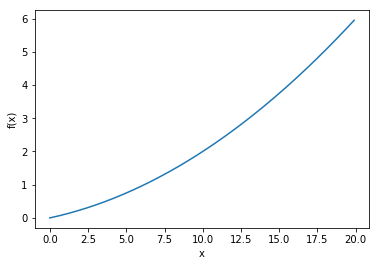

In [20]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()
%matplotlib inline

我们来计算一下这个函数在x = 5和x = 10处的导数:

In [21]:
numerical_diff(function_1, 5)
numerical_diff(function_1, 10)

0.1999999999990898

0.2999999999986347

这里计算的导数是f(x)相对于x的变化量，对应函数的斜率。  
另外，$$
f ( x ) = 0.01 x ^ { 2 } + 0.1 x
$$的 解析解是$$
\frac { \mathrm { d } f ( x ) } { \mathrm { d } x } = 0.02 x + 0.1
$$。
因 此，在 x = 5 和x = 10处，“真的导数”分别为0.2和0.3。  
和上面的结果相比，我们发现虽然严格意义上它们并不一致，但误差非常小。  
实际上，误差小到基本上可以认为它们是相等的。  
现在，我们用上面的数值微分的值作为斜率，画一条直线。结果如图4-7所示，可以确认这些直线确实对应函数的切线。  

<img src="./imgs/4_7.png"></img>

### 4.3.3、偏导数

接下来，我们看一下式(4.6)表示的函数。  
虽然它只是一个计算参数的平方和的简单函数，但是请注意和上例不同的是，这里有两个变量。  
$$
f \left( x _ { 0 } , x _ { 1 } \right) = x _ { 0 } ^ { 2 } + x _ { 1 } ^ { 2 }
$$
<center>式（4.6）</center>

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 或者return np.sum(x**2)

这里，我们假定向参数输入了一个NumPy数组。  
函数的内部实现比较简单，先计算NumPy数组中各个元素的平方，再求它们的和（np.sum(x**2)也可以实现同样的处理）。  
我们来画一下这个函数的图像。结果如图4-8所示，是一个三维图像。

<img src="./imgs/4_8.png"></img>

现在我们来求式（4.6）的导数。  
这里需要注意的是，式（4.6）有两个变量，所以有必要区分对哪个变量求导数，即对x0和x1两个变量中的哪一个求导数。  
另外，我们把这里讨论的有多个变量的函数的导数称为偏导数。  
用数学式表示的话，可以写成:$$
\frac { \partial f } { \partial x _ { 0 } } 、 \frac { \partial f } { \partial x _ { 1 } }
$$

怎么求偏导数呢？我们先试着解一下下面两个关于偏导数的问题。

问题1：求x0 = 3, x1 = 4时，关于x0的偏导数$$
\frac { \partial f } { \partial x _ { 0 } }
$$

In [23]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [24]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

问题2：求x0 = 3, x1 = 4时，关于x1的偏导数$$
\frac { \partial f } { \partial x _ { 1 } }
$$

In [25]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [26]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

在这些问题中，我们定义了一个只有一个变量的函数，并对这个函数进行了求导。  
例如，问题1中，我们定义了一个固定x1 = 4的新函数，然后对只有变量x0的函数应用了求数值微分的函数。  
从上面的计算结果可知，问题1的答案是6.00000000000378，问题2的答案7.999999999999119，和解析解的导数基本一致。

像这样，偏导数和单变量的导数一样，都是求某个地方的斜率。  
不过，偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值。  
在上例的代码中，为了将目标变量以外的变量固定到某些特定的值上，我们定义了新函数。  
然后，对新定义的函数应用了之前的求数值微分的函数，得到偏导数。  

## 4.4、梯度

在刚才的例子中，我们按变量分别计算了x0和x1的偏导数。  
现在，我们希望一起计算x0和x1的偏导数$$
\left( \frac { \partial f } { \partial x _ { 0 } } , \frac { \partial f } { \partial x _ { 1 } } \right)
$$  
比如，我们来考虑求x0 = 3, x1 = 4时(x0, x1)的偏导数 。  
另外，像这样的由全部变量的偏导数汇总而成的向量称为**梯度**（gradient）。  
梯度可以像下面这样来实现。

In [27]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

函数 numerical_gradient(f, x)的实现看上去有些复杂，但它执行的处理和求单变量的数值微分基本没有区别。  
需要补充说明一下的是， np.zeros_like(x)会生成一个形状和x相同、所有元素都为0的数组。  

函数numerical_gradient(f, x)中，参数f为函数，x为NumPy数组，该函数对NumPy数组x的各个元素求数值微分。  
现在，我们用这个函数实际计算一下梯度。  
这里我们求点(3, 4)、 (0, 2)、 (3, 0)处的梯度。  

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))
numerical_gradient(function_2, np.array([0.0, 2.0]))
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 8.])

array([0., 4.])

array([6., 0.])

像这样，我们可以计算(x0, x1)在各点处的梯度。  
上例中，点(3, 4)处的梯度是(6, 8)、点(0, 2)处的梯度是(0, 4)、点(3, 0)处的梯度是(6, 0)。  
这个梯度意味着什么呢？  
为了更好地理解，我们把$$
f \left( x _ { 0 } + x _ { 1 } \right) = x _ { 0 } ^ { 2 } + x _ { 1 } ^ { 2 }
$$的梯度画在图上。  
不过，这里我们画的是元素值为负梯度 B 的向量。  
<img src="./imgs/4_9.png"></img>

如图4-9所示， $$
f \left( x _ { 0 } + x _ { 1 } \right) = x _ { 0 } ^ { 2 } + x _ { 1 } ^ { 2 }
$$的梯度呈现为有向向量（箭头）。  
观察图4-9，我们发现梯度指向函数f(x0,x1)的“最低处”（最小值），就像指南针
一样，所有的箭头都指向同一点。  
其次，我们发现离“最低处”越远，箭头越大。

虽然图 4-9 中的梯度指向了最低处，但并非任何时候都这样。  
实际上，梯度会指向各点处的函数值降低的方向。  
更严格地讲，梯度指示的方向是各点处的函数值减小最多的方向。  
这是一个非常重要的性质，请一定牢记!

### 4.4.1　梯度法

机器学习的主要任务是在学习时寻找最优参数。  
同样地，神经网络也必须在学习时找到最优参数（权重和偏置）。  
这里所说的最优参数是指损失函数取最小值时的参数。  
但是，一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。  
而通过巧妙地使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是梯度法。  

这里需要注意的是，梯度表示的是各点处的函数值减小最多的方向。  
因此，无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。  
实际上，在复杂的函数中，梯度指示的方向基本上都不是函数值最小处。

函数的极小值、最小值以及被称为**鞍点**（saddle point） 的地方，梯度为0。  
极小值是局部最小值，也就是限定在某个范围内的最小值。  
鞍点是从某个方向上看是极大值，从另一个方向上看则是极小值的点。  
虽然梯度法是要寻找梯度为0的地方，但是那个地方不一定就是最小值（也有可能是极小值或者鞍点）。  
此外，当函数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，陷入被称为“学习高原”的无法前进的停滞期。

虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。  
因此，在寻找函数的最小值（或者尽可能小的值）的位置的任务中，要以梯度的信息为线索，决定前进的方向。  

此时梯度法就派上用场了。  
在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。  
像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是**梯度法**（gradient method）。  
梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。  

根据目的是寻找最小值还是最大值，梯度法的叫法有所不同。  
严格地讲，寻找最小值的梯度法称为**梯度下降法**（gradient descent method），寻找最大值的梯度法称为**梯度上升法**（gradient ascent method）。  
但是通过反转损失函数的符号，求最小值的问题和求最大值的问题会变成相同的问题，因此“下降”还是“上升”的差异本质上并不重要。  
一般来说，神经网络（深度学习）中，梯度法主要是指梯度下降法。

现在，我们尝试用数学式来表示梯度法，如式（4.7）所示。
$$
\begin{array} { l } { x _ { 0 } = x _ { 0 } - \eta \frac { \partial f } { \partial x _ { 0 } } } \\ { x _ { 1 } = x _ { 1 } - \eta \frac { \partial f } { \partial x _ { 1 } } } \end{array}
$$
<center>式（4.7）</center>

式（4.7）的η表示更新量，在神经网络的学习中，称为**学习率**（learning rate）。  
学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。  

式（4.7）是表示更新一次的式子，这个步骤会反复执行。  
也就是说，每一步都按式（4.7）更新变量的值，通过反复执行此步骤，逐渐减小函数值。  
虽然这里只展示了有两个变量时的更新过程，但是即便增加变量的数量，也可以通过类似的式子（各个变量的偏导数）进行更新。  

学习率需要事先确定为某个值，比如0.01或0.001。  
一般而言，这个值过大或过小，都无法抵达一个“好的位置”。  
在神经网络的学习中，一般会一边改变学习率的值，一边确认学习是否正确进行了。  

用Python来实现梯度下降法：

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

参数 f是要进行最优化的函数， init_x是初始值， lr是学习率learning
rate，step_num是梯度法的重复次数。   
numerical_gradient(f,x)会求函数的梯度，用该梯度乘以学习率得到的值进行更新操作，由step_num指定重复的次数。  

使用这个函数可以求函数的极小值，顺利的话，还可以求函数的最小值。
下面，我们就来尝试解决下面这个问题。

问题：请用梯度法求$$
f \left( x _ { 0 } + x _ { 1 } \right) = x _ { 0 } ^ { 2 } + x _ { 1 } ^ { 2 }
$$的最小值

In [30]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [31]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

这里，设初始值为 (-3.0, 4.0)，开始使用梯度法寻找最小值。  
最终的结果是 (-6.1e-10, 8.1e-10)，非常接近 (0， 0)。  
实际上，真的最小值就是 (0， 0)，所以说通过梯度法我们基本得到了正确结果。  
如果用图来表示梯度法的更新过程，则如图4-10所示。  
可以发现，原点处是最低的地方，函数的取值一点点在向其靠近。  

<img src="./imgs/4_10.png"></img>

前面说过，学习率过大或者过小都无法得到好的结果。我们来做个实验
验证一下。

In [32]:
#学习率过大的例子： lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [33]:
#学习率过小的例子： lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

实验结果表明，学习率过大的话，会发散成一个很大的值；  
反过来，学习率过小的话，基本上没怎么更新就结束了。  
也就是说，设定合适的学习率是一个很重要的问题。

像学习率这样的参数称为**超参数**。  
这是一种和神经网络的参数（权重和偏置）性质不同的参数。  
相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。  
一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定。

### 4.4.2、神经网络的梯度

神经网络的学习也要求梯度。  
这里所说的梯度是指损失函数关于权重参数的梯度。  
比如，有一个只有一个形状为2 × 3的权重W的神经网络，损失函数用L表示。  
此时，梯度可以用$$
\frac { \partial L } { \partial W }
$$表示。用数学式表示的话，如下所示：$$
\begin{aligned} \boldsymbol { W } & = \left( \begin{array} { c c c } { w _ { 11 } } & { w _ { 12 } } & { w _ { 13 } } \\ { w _ { 21 } } & { w _ { 22 } } & { w _ { 23 } } \end{array} \right) \\ \frac { \partial L } { \partial \boldsymbol { W } } & = \left( \begin{array} { c c c } { \frac { \partial L } { \partial w _ { 11 } } } & { \frac { \partial L } { \partial w _ { 12 } } } & { \frac { \partial L } { \partial w _ { 13 } } } \\ { \frac { \partial L } { \partial w _ { 21 } } } & { \frac { \partial L } { \partial w _ { 22 } } } & { \frac { \partial L } { \partial w _ { 23 } } } \end{array} \right) \end{aligned}
$$
<center>式（4.8）</center>

$$
\frac { \partial L } { \partial W }
$$的元素由各个元素关于W的偏导数构成。  
比如，第1行第1列的元素$$
\frac { \partial L } { \partial w _ { 11 } }
$$表示当w11稍微变化时，损失函数L会发生多大变化。  
这里的重点是，$$
\frac { \partial L } { \partial W }
$$的形状和W相同。  
实际上，式（4.8）中的W和$$
\frac { \partial L } { \partial W }
$$都是2 × 3的形状。

下面，我们以一个简单的神经网络为例，来实现求梯度的代码。  
为此，我们要实现一个名为 simpleNet的类：

In [34]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

这里使用了 common/functions.py中的 softmax和 cross_entropy_error方法，以及common/gradient.py中的numerical_gradient方法。  
simpleNet类只有一个实例变量，即形状为2× 3的权重参数。  
它有两个方法，一个是用于预测的 predict(x)，另一个是用于求损失函数值的 loss(x,t)。  
这里参数 x接收输入数据， t接收正确解标签。  
现在我们来试着用一下这个simpleNet。  

In [35]:
net = simpleNet()
net.W

array([[0.39534965, 1.79930307, 0.78469844],
       [0.4861724 , 0.17423563, 0.10376392]])

In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([0.67476495, 1.2363939 , 0.56420659])

In [37]:
np.argmax(p) # 最大值的索引

1

In [38]:
t = np.array([0, 0, 1]) # 正确解标签
net.loss(x,t)

1.4049729266716486

接下来求梯度。和前面一样，我们使用 numerical_gradient(f, x)求梯度（这里定义的函数f(W)的参数W是一个伪参数。  
因为numerical_gradient(f,x)会在内部执行f(x),为了与之兼容而定义了f(W)）。  

In [39]:
def f(W):
    return net.loss(x, t)

In [40]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.16443482,  0.28834083, -0.45277566],
       [ 0.24665223,  0.43251125, -0.67916348]])

numerical_gradient(f, x) 的参数f是函数， x是传给函数f的参数。  
因此，这里参数x取 net.W，并定义一个计算损失函数的新函数f，然后把这个新定义的函数传递给numerical_gradient(f, x)。

numerical_gradient(f, net.W)的结果是dW，一个形状为2 × 3的二维数组。
观察一下dW的内容，例如，会发现$$
\frac { \partial L } { \partial W }
$$中的$$
\frac { \partial L } { \partial w _ { 11 } }
$$的值大约是0.2，这表示如
果将w11增加h，那么损失函数的值会增加0.2h。再如， $$
\frac { \partial L } { \partial w _ { 23 } }
$$对应的值大约
是−0.5，这表示如果将w23增加h，损失函数的值将减小0.5h。因此，从减
小损失函数值的观点来看， w23应向正方向更新， w11应向负方向更新。至于
更新的程度， w23比w11的贡献要大。

另外，在上面的代码中，定义新函数时使用了“def f(x):···”的形式。  
实际上， Python中如果定义的是简单的函数，可以使用 lambda表示法。  
使用lambda的情况下，上述代码可以如下实现。  

In [41]:
f = lambda w: net.loss(x, t)

In [42]:
dW=numerical_gradient(f,net.W)

求出神经网络的梯度后，接下来只需根据梯度法，更新权重参数即可。  
在下一节中，我们会以2层神经网络为例，实现整个学习过程。

为了对应形状为多维数组的权重参数 W，这里使用的 numerical_gradient()和之前的实现稍有不同。  
不过，改动只是为了对应多维数组，所以改动并不大。  
这里省略了对代码的说明，想知道细节的读者请参考源代码（ common/gradient.py）。  

## 4.5、学习算法的实现

神经网络的学习步骤

#### 前提

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。  
神经网络的学习分成下面4个步骤。

#### 步骤1（ mini-batch）

从训练数据中随机选出一部分数据，这部分数据称为mini-batch。  
我们的目标是减小mini-batch的损失函数的值。

#### 步骤2（计算梯度）

为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。  
梯度表示损失函数的值减小最多的方向。

#### 步骤3（更新参数）

将权重参数沿梯度方向进行微小更新。

#### 步骤4（重复）

重复步骤1、步骤2、步骤3。

神经网络的学习按照上面4个步骤进行。  
这个方法通过梯度下降法更新参数，不过因为这里使用的数据是随机选择的mini batch数据，所以又称为**随机梯度下降法**（stochastic gradient descent）。  
“随机”指的是“随机选择的”的意思，因此，随机梯度下降法是“对随机选择的数据进行的梯度下降法”。  
深度学习的很多框架中，随机梯度下降法一般由一个名为SGD的函数来实现。  
SGD来源于随机梯度下降法的英文名称的首字母。  

下面，我们来实现手写数字识别的神经网络。  
这里以2层神经网络（隐藏层为1层的网络）为对象，使用MNIST数据集进行学习。  

### 4.5.1、2层神经网络的类

首先，我们将这个2层神经网络实现为一个名为TwoLayerNet的类，实现
过程如下所示：

In [43]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
        weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * \
        np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
        np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

我们先把这个类中用到
的变量和方法整理一下。表4-1中只罗列了重要的变量，表4-2中则罗列了所有的方法：

<center>表4-1　TwolayerNet类中使用的变量</center>  

|变量 | 说明|
|- | -|
|params | 保存神经网络的参数的字典型变量（实例变量）。params['W1']是第1层的权重，params['b1']是第1层的偏置。params['W2']是第2层的权重， params['b2']是第2层的偏置。|
|grads | 保存梯度的字典型变量（numerical_gradient()方法的返回值）。grads['W1']是第1层权重的梯度， grads['b1']是第1层偏置的梯度。grads['W2']是第2层权重的梯度， grads['b2']是第2层偏置的梯度|

<center>表4-2　TwoLayerNet类的方法</center>  

|方法|说明|
|-|-|
|\_\_init__(self, input_size,hidden_size, output_size)|进行初始化。参数从头开始依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数|
|predict(self, x)|进行识别（推理）。参数x是图像数据|
|loss(self, x, t)|计算损失函数的值。参数 x是图像数据， t是正确解标签（后面3个方法的参数也一样）|
|accuracy(self, x, t)|计算识别精度|
|numerical_gradient(self, x, t)|计算权重参数的梯度|
|gradient(self, x, t)|计算权重参数的梯度。numerical_gradient()的高速版，将在下一章实现|

TwoLayerNet类有params和grads两个字典型实例变量。   
params变量中保存了权重参数，比如params['W1']以NumPy数组的形式保存了第1层的权重参数。  
此外，第1层的偏置可以通过param['b1']进行访问。  

In [44]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(784, 100)

(100,)

(100, 10)

(10,)

如上所示， params变量中保存了该神经网络所需的全部参数。  
并且，params变量中保存的权重参数会用在推理处理（前向处理）中。顺便说一下，推理处理的实现如下所示。  

In [45]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
y = net.predict(x)

此外，与params变量对应， grads变量中保存了各个参数的梯度。  
如下所示，使用 numerical_gradient()方法计算梯度后，梯度的信息将保存在 grads变
量中。  

In [46]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
t = np.random.rand(100, 10) # 伪正确解标签（100笔）
grads = net.numerical_gradient(x, t) # 计算梯度
grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(784, 100)

(100,)

(100, 10)

(10,)

接着，我们来看一下 TwoLayerNet的方法的实现。  
首先是 __init__(self,input_size, hidden_size, output_size)方法，它是类的初始化方法（所谓初始化方法，就是生成TwoLayerNet实例时被调用的方法）。  
从第1个参数开始，依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数。  
另外，因为进行手写数字识别时，输入图像的大小是784（28 × 28），输出为10个类别，所以指定参数input_size=784、 output_size=10，将隐藏层的个数hidden_size设置为一个合适的值即可。  

此外，这个初始化方法会对权重参数进行初始化。  
如何设置权重参数的初始值这个问题是关系到神经网络能否成功学习的重要问题。  
后面我们会详细讨论权重参数的初始化，这里只需要知道，权重使用符合高斯分布的随机数进行初始化，偏置使用 0进行初始化。   
predict(self, x)和accuracy(self, x, t)的实现和上一章的神经网络的推理处理基本一样。  
如果仍有不明白的地方，请再回顾一下上一章的内容。另外， loss(self, x, t)是计算损失函数值的方法。这个方法会基于predict()的结果和正确解标签，
计算交叉熵误差。
剩下的 numerical_gradient(self, x, t)方法会计算各个参数的梯度。  
根据数值微分，计算各个参数相对于损失函数的梯度。  
另外， gradient(self, x, t)是下一章要实现的方法，该方法使用误差反向传播法高效地计算梯度。  

numerical_gradient(self, x, t)基于数值微分计算参数的梯度。  
下一章，我们会介绍一个高速计算梯度的方法，称为误差反向传播法。  
用误差反向传播法求到的梯度和数值微分的结果基本一致，但可以高速地进行处理。  
使用误差反向传播法计算梯度的 gradient(self,x, t)方法会在下一章实现，不过考虑到神经网络的学习比较花时间，想节约学习时间的读者可以替换掉这里的 numerical_gradient(self,x, t)，抢先使用gradient(self, x, t)！

### 4.5.2、mini-batch的实现

神经网络的学习的实现使用的是前面介绍过的mini-batch学习。  
所谓mini-batch学习，就是从训练数据中随机选择一部分数据（称为mini-batch），再以这些mini-batch为对象，使用梯度法更新参数的过程。  
下面，我们就以TwoLayerNet类为对象，使用MNIST数据集进行学习。  

In [47]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
# 超参数
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

这里， mini-batch的大小为100，需要每次从60000个训练数据中随机取出100个数据（图像数据和正确解标签数据）。  
然后，对这个包含100笔数据的mini-batch求梯度，使用随机梯度下降法（SGD）更新参数。  
这里，梯度法的更新次数（循环的次数）为10000。  
每更新一次，都对训练数据计算损失函数的值，并把该值添加到数组中。  
用图像来表示这个损失函数的值的推移，如图4-11所示。

<img src="./imgs/4_11.png"></img>

观察图4-11，可以发现随着学习的进行，损失函数的值在不断减小。  
这是学习正常进行的信号，表示神经网络的权重参数在逐渐拟合数据。  
也就是说，神经网络的确在学习！  
通过反复地向它浇灌（输入）数据，神经网络正在逐渐向最优参数靠近。

### 4.5.3、基于测试数据的评价

根据图4-11呈现的结果，我们确认了通过反复学习可以使损失函数的值逐渐减小这一事实。  
不过这个损失函数的值，严格地讲是“对训练数据的某个mini-batch的损失函数”的值。  
训练数据的损失函数值减小，虽说是神经网络的学习正常进行的一个信号，但光看这个结果还不能说明该神经网络在其他数据集上也一定能有同等程度的表现。  

神经网络的学习中，必须确认是否能够正确识别训练数据以外的其他数据，即确认是否会发生过拟合。  
过拟合是指，虽然训练数据中的数字图像能被正确辨别，  
但是不在训练数据中的数字图像却无法被识别的现象。  

神经网络学习的最初目标是掌握泛化能力，因此，要评价神经网络的泛化能力，就必须使用不包含在训练数据中的数据。  
下面的代码在进行学习的过程中，会定期地对训练数据和测试数据记录识别精度。  
这里，每经过一个epoch，我们都会记录下训练数据和测试数据的识别精度。   

**epoch**是一个单位。  
一个epoch表示学习中所有训练数据均被使用过一次时的更新次数。  
比如，对于 10000笔训练数据，用大小为 100笔数据的mini-batch进行学习时，重复随机梯度下降法100次，所有的训练数据就都被“看过”了。此时，100次就是一个epoch。  

为了正确进行评价，我们来稍稍修改一下前面的代码。  

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# (x_train, t_train), (x_test, t_test) = \ load_mnist(normalize=True, one_hot_label = True)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

# 超参数
iters_num = 600
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.097, 0.0979


在上面的例子中，每经过一个epoch，就对所有的训练数据和测试数据计算识别精度，并记录结果。  
之所以要计算每一个epoch的识别精度，是因为如果在for语句的循环中一直计算识别精度，会花费太多时间。  并且，也没有必要那么频繁地记录识别精度（只要从大方向上大致把握识别精度的推
移就可以了）。  
因此，我们才会每经过一个epoch就记录一次训练数据的识别精度。

把从上面的代码中得到的结果用图表示的话，如图4-12所示：

<img src="./imgs/4_12.png"></img>

图4-12中，实线表示训练数据的识别精度，虚线表示测试数据的识别精度。  
如图所示，随着epoch的前进（学习的进行），我们发现使用训练数据和测试数据评价的识别精度都提高了，并且，这两个识别精度基本上没有差异（两条线基本重叠在一起）。  
因此，可以说这次的学习中没有发生过拟合的现象。

## 4.6 小结

In [ ]:
'''
1、机器学习中使用的数据集分为训练数据和测试数据。
2、神经网络用训练数据进行学习，并用测试数据评价学习到的模型的
泛化能力。
3、神经网络的学习以损失函数为指标，更新权重参数，以使损失函数
的值减小。
4、利用某个给定的微小值的差分求导数的过程，称为数值微分。
5、利用数值微分，可以计算权重参数的梯度。
6、数值微分虽然费时间，但是实现起来很简单。下一章中要实现的稍微复杂一些的误差反向传播法可以高速地计算梯度。
'''